In [1]:
import numpy
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from colorama import Fore, Back, Style


In [2]:
### NOZZLE data
n1x= [0.75,1,1.25,1.5,1.75,1.875]
n1y=[ 1,1.5,2,3,4.3,5.75]
n2x= [1.000, 1.500, 1.750, 2.000, 2.2501, 2.500, 2.75, 3.00, 3.20]
n2y=[0.875,1.150,1.375,1.750,2.250,2.875,3.75,4.85,6.00]
n3x=[2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25]
n3y=[0.875,1.125,1.5,1.75,2,2.5,2.75,3.25,3.5,4,4.5,5,5.5,6]
n4x=[2.75,3.5,4,4.5,5,5.5,5.75,6.5,7.25,7.5,8,9,9.5,10,10.75]
n4y=[0.625,0.77,1,1.25,1.5,1.75,2,2.5,3,3.25,3.72,4.6,5,5.6,6.5]

INPUT PARAMETERS HERE:

In [3]:
### ENTER DATA HERE:
static_pressure = 4.0
Nozzle_1 = 3.5
Nozzle_2 = 3
Nozzle_3 = 2
Nozzle_4 = 1.2

### OPERATING PRESSURE IN BAR:
pressure_spray = 2.6
pressure_rotor = 3.5
pressure = 2.6
###
check_flow = 33

##### POLYNOMIAL DEGREE SET HERE:
polydeg = 3

In [4]:
## NOZZLE MODELS 1-2-3-4 calibration curves
nozzle1_model = numpy.poly1d(numpy.polyfit(n1x, n1y, 3))
line1 = numpy.linspace(0.75, 2, 100)
nozzle2_model = numpy.poly1d(numpy.polyfit(n2x, n2y, 3))
line2 = numpy.linspace(0.75, 3.3, 100)
nozzle3_model = numpy.poly1d(numpy.polyfit(n3x, n3y, 3))
line3 = numpy.linspace(1.75, 5.5, 100)
nozzle4_model = numpy.poly1d(numpy.polyfit(n4x, n4y, 3))
line4 = numpy.linspace(2.25, 11, 100)
## 
n1_model = numpy.poly1d(numpy.polyfit(n1y, n1x, 3))
n2_model = numpy.poly1d(numpy.polyfit(n2y, n2x, 3))
n3_model = numpy.poly1d(numpy.polyfit(n3y, n3x, 3))
n4_model = numpy.poly1d(numpy.polyfit(n4y, n4x, 3))
## Flow characteristics Curve model
model5_datay = [0, n1_model(Nozzle_1),n2_model(Nozzle_2) ,n3_model(Nozzle_3), n4_model(Nozzle_4)]
model5_datax = [static_pressure,   Nozzle_1, Nozzle_2, Nozzle_3, Nozzle_4]
model5 = numpy.poly1d(numpy.polyfit(model5_datax, model5_datay, polydeg))
## creating lookuptable for the inverted lookup - from liter per minute to pressure

### - finds THE CLOSEST NUMBER'S INDEX in a numpy
def find_closest_index(arr, val):
       idx = numpy.abs(arr - val).argmin()
       return idx

max_of_x = max(model5_datax)
min_of_x = min(model5_datax)
line5 = numpy.linspace(min_of_x, max_of_x, 100)

curve_m3h = model5(line5)       

spray_zone_flow = (model5(pressure_spray)) 
rotor_zone_flow = (model5(pressure_rotor))

spray_zone_flow_liter = spray_zone_flow * (1000/60)
rotor_zone_flow_liter=  rotor_zone_flow * (1000/60)

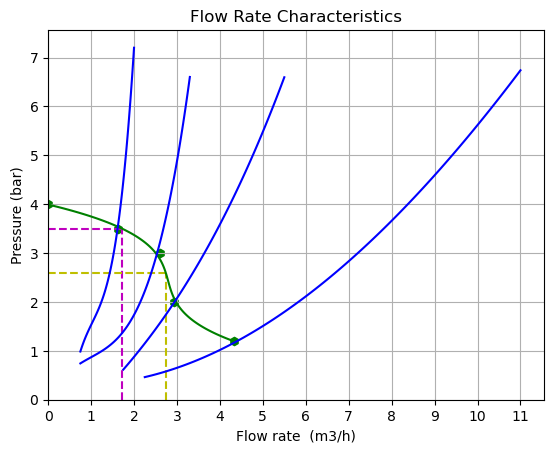

Spray Zone Available Flow at 2.6 bar:  45.64 l/min  ( 2.74 m3/h )
Rotor Zone Available Flow at 3.5 bar:  28.71 l/min ( 1.72 m3/h )


In [5]:

f, ax = plt.subplots(1)


### ROTOR LINES
line_rotorx = numpy.linspace(rotor_zone_flow,rotor_zone_flow,100)
line_rotory = numpy.linspace(0,pressure_rotor,100)
line2_rotorx =numpy.linspace(0,rotor_zone_flow,100)
line2_rotory =numpy.linspace(pressure_rotor, pressure_rotor,100)
plt.plot(line_rotorx, line_rotory, 'm--')
plt.plot(line2_rotorx, line2_rotory, 'm--')

### SPRAY LINES
line_sprayx = numpy.linspace(spray_zone_flow,spray_zone_flow,100)
line_sprayy = numpy.linspace(0,pressure_spray,100)
line2_sprayx =numpy.linspace(0,spray_zone_flow,100)
line2_sprayy =numpy.linspace(pressure_spray, pressure_spray,100)
plt.plot(line_sprayx, line_sprayy, 'y--')
plt.plot(line2_sprayx, line2_sprayy, 'y--')


## FLOW CHARACTERISTICS CURVE
max_of_x = max(model5_datax)
min_of_x = min(model5_datax)
line5 = numpy.linspace(min_of_x, max_of_x, 100)


plt.title("Flow Rate Characteristics")
plt.xlabel("Flow rate  (m3/h)")
plt.ylabel("Pressure (bar)")

plt.scatter(model5_datay, model5_datax, c="green", marker='h')
plt.plot(model5(line5),line5, "g")
plt.plot(line4, nozzle4_model(line4), "b")
plt.plot(line3, nozzle3_model(line3), "b")
plt.plot(line2, nozzle2_model(line2), "b")
plt.plot(line1, nozzle1_model(line1), "b",label='line dddd1')


plt.xticks(numpy.arange(0, 12, 1))
plt.yticks(numpy.arange(0, 8, 1))
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.grid()
plt.show(f)


print("Spray Zone Available Flow at",pressure_spray, "bar: " , "%.2f" % spray_zone_flow_liter, "l/min  (", "%.2f" % spray_zone_flow, "m3/h )")

print("Rotor Zone Available Flow at", pressure_rotor, "bar: ", "%.2f" % rotor_zone_flow_liter, "l/min (", "%.2f" % rotor_zone_flow, "m3/h )")


ENTER THE FLOW YOU HAVE IF YOU WANT TO MODIFY THE INITIAL SETUP:

In [19]:
### TO CHECK THE AVAILABLE PRESSURE AT A GIVEN FLOW, LITER PER MIN: 
check_flow = 10.2

In [7]:

check_flow_m3h = check_flow*(60/1000)

flow_result = find_closest_index(curve_m3h, check_flow_m3h)
pressure_result = line5[flow_result]




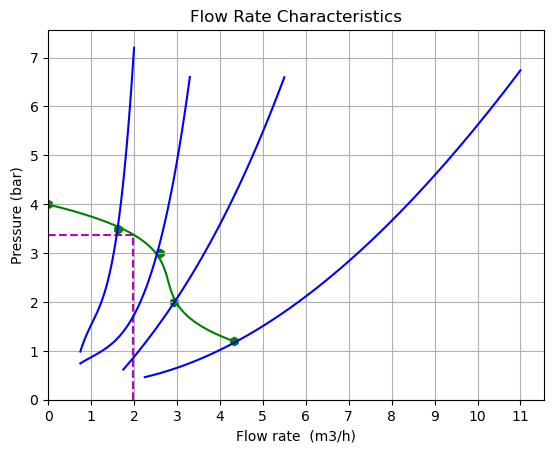

The entered check flow value is:  33.00 l/min   which is  1.98 m3/h
The pressure at this flowrate is :  3.38  bar


In [8]:






f, ax = plt.subplots(1)

line_testx = numpy.linspace(check_flow_m3h,check_flow_m3h,100)
line_testy = numpy.linspace(0,pressure_result,100)
line2_testx =numpy.linspace(0,check_flow_m3h,100)
line2_testy =numpy.linspace(pressure_result, pressure_result,100)
plt.plot(line_testx, line_testy, 'm--')
plt.plot(line2_testx, line2_testy, 'm--')

## VIZ
max_of_x = max(model5_datax)
min_of_x = min(model5_datax)
line5 = numpy.linspace(min_of_x, max_of_x, 100)


plt.title("Flow Rate Characteristics")
plt.xlabel("Flow rate  (m3/h)")
plt.ylabel("Pressure (bar)")

plt.scatter(model5_datay, model5_datax, c="green", marker='h')
plt.plot(model5(line5),line5, "g")
plt.plot(line4, nozzle4_model(line4), "b")
plt.plot(line3, nozzle3_model(line3), "b")
plt.plot(line2, nozzle2_model(line2), "b")
plt.plot(line1, nozzle1_model(line1), "b",label='line dddd1')

flowrate = model5(pressure)*(1000/60)


plt.xticks(numpy.arange(0, 12, 1))
plt.yticks(numpy.arange(0, 8, 1))
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.grid()
plt.show(f)


print("The entered check flow value is: ", "%.2f" % check_flow, "l/min   which is ",  "%.2f" % check_flow_m3h, "m3/h")
print("The pressure at this flowrate is : ", "%.2f" % pressure_result, " bar" )


In [9]:
### PRESSURE LOSS CALCULATIONS
def pipespeed (flow_in_pipe, pipe_diameter):
    pipe_cr_area = ((pipe_diameter * pipe_diameter) * math.pi / 4)/1000000
    velocity = (flow_in_pipe*(60/1000))/pipe_cr_area*(1/3600)
    return velocity


ANOTHER DATA ENTRY:
- length of the pipes in the system
- pressure losses on the valves
- pressure losses on the filters

In [10]:
### PRESSURE LOSS DATA ENTRY
###
kpe25_pipe_length = 0
kpe32_pipe_length = 61
kpe40_pipe_length = 0
pressure_loss_valve = 0.12
pressure_loss_filter =0.1
### # ###

speed25 = pipespeed(check_flow,20.4)
speed32 = pipespeed(check_flow,26.2)
speed40 = pipespeed(check_flow,32.8)
#print(check_flow)
#print(speed25, speed32, speed40)

In [11]:
## PIPE DATA from the manufacturer

kpe25_v = numpy.array([0.17,0.34,0.51,0.68,0.85,1.02,1.19,1.36,1.53,1.70,1.87,2.04])
kpe25_p = numpy.array([0.03,0.09,0.19,0.33,0.49,0.69,0.92,1.18,1.47,1.79,2.13,2.5])
#print(len(kpe25_v), len(kpe25_p))
kpe32_v = numpy.array([0.1,0.21,0.31,0.41,0.51,0.62,0.72,0.82,0.93,1.03,1.13,1.24,1.34,1.44,1.54,1.65,1.75,1.85,1.96,2.06])
kpe32_p = numpy.array([0.01,0.03,0.06,0.1,0.15,0.21,0.27,0.35,0.43,0.53,0.63,0.74,0.86,0.99,1.12,1.26,1.41,1.57,1.74,1.91])
#print(len(kpe32_v), len(kpe32_p))
kpe40_v = numpy.array([0.07,0.13,0.20,0.26,0.33,0.39,0.46,0.53,0.59,0.65,0.72,0.79,0.85,0.92,0.99,1.05,1.12,1.18,1.25,1.31,1.48,1.64,1.81,1.97,2.13])
kpe40_p = numpy.array([0,0.01,0.02,0.03,0.05,0.07,0.09,0.12,0.15,0.18,0.21,0.25,0.29,0.33,0.38,0.42,0.47,0.53,0.58,0.64,0.80,0.97,1.15,1.36,1.57])
#print(len(kpe40_v), len(kpe40_p))

In [12]:
#print(type(speed))

### velocity - pressure loss lookup
kpe25_index = find_closest_index(kpe25_v, speed25)
kpe25_pressure_result = kpe25_p[kpe25_index]
print("Fluid speed in a KPE 25 pipe is: ", "%.2f" % speed25 ,"m/sec   Pressure loss per 100m in a KPE 25 pipe is:", kpe25_pressure_result, "bar")
kpe32_index = find_closest_index(kpe32_v, speed32)
kpe32_pressure_result = kpe32_p[kpe32_index]
print("Fluid speed in a KPE 32 pipe is: ", "%.2f" % speed32 ,"m/sec   Pressure loss per 100m in a KPE 32 pipe is:", kpe32_pressure_result, "bar")
kpe40_index = find_closest_index(kpe40_v, speed40)
kpe40_pressure_result = kpe40_p[kpe40_index]
print("Fluid speed in a KPE 40 pipe is: ", "%.2f" % speed40 ,"m/sec   Pressure loss per 100m in a KPE 40 pipe is:", kpe40_pressure_result, "bar")
print("-----------------------------------------------------------------------------------------")
total_kpe25_loss = (kpe25_pressure_result/100)*kpe25_pipe_length
total_kpe32_loss = (kpe32_pressure_result/100)*kpe32_pipe_length
total_kpe40_loss = (kpe40_pressure_result/100)*kpe40_pipe_length
print("Total pressure loss on the given KPE25 pipe: ", kpe25_pipe_length, "m   ", "%.2f" % total_kpe25_loss, "bar")
print("Total pressure loss on the given KPE32 pipe: ", kpe32_pipe_length, "m   ", "%.2f" % total_kpe32_loss, "bar")
print("Total pressure loss on the given KPE40 pipe: ", kpe40_pipe_length, "m   ", "%.2f" % total_kpe40_loss, "bar")
print("Other Losses: ")
print("Pressure loss on the Valve: ", pressure_loss_valve, "bar")
print("Pressure loss on the Filter: ", pressure_loss_filter, "bar")
totalloss = total_kpe25_loss+total_kpe32_loss+total_kpe40_loss+pressure_loss_filter+pressure_loss_valve
print("TOTAL pressure loss on the system: ", Fore.YELLOW +  "%.2f" % totalloss,  "bar", Style.RESET_ALL)
remainingpressure = pressure_result - totalloss
print("-----------------------------------------------------------------------------------------")
print("The entered check flow value is: ", "%.2f" % check_flow, "l/min   which is ",  "%.2f" % check_flow_m3h, "m3/h")
print("The pressure at this flowrate is : ", Fore.GREEN + "%.2f" % pressure_result, " bar", Style.RESET_ALL)
print(">> TOTAL REMAINING PRESSURE on the system: ", Fore.BLUE + "%.2f" % remainingpressure,  "bar", Style.RESET_ALL, "<<")

Fluid speed in a KPE 25 pipe is:  1.68 m/sec   Pressure loss per 100m in a KPE 25 pipe is: 1.79 bar
Fluid speed in a KPE 32 pipe is:  1.02 m/sec   Pressure loss per 100m in a KPE 32 pipe is: 0.53 bar
Fluid speed in a KPE 40 pipe is:  0.65 m/sec   Pressure loss per 100m in a KPE 40 pipe is: 0.18 bar
-----------------------------------------------------------------------------------------
Total pressure loss on the given KPE25 pipe:  0 m    0.00 bar
Total pressure loss on the given KPE32 pipe:  61 m    0.32 bar
Total pressure loss on the given KPE40 pipe:  0 m    0.00 bar
Other Losses: 
Pressure loss on the Valve:  0.12 bar
Pressure loss on the Filter:  0.1 bar
TOTAL pressure loss on the system:  0.54 bar 
-----------------------------------------------------------------------------------------
The entered check flow value is:  33.00 l/min   which is  1.98 m3/h
The pressure at this flowrate is :  3.38  bar 
>> TOTAL REMAINING PRESSURE on the system:  2.83 bar  <<
